# **I'm going to explore the dataset that contains statistics about UFC fighters including information on their wins, losses, draws, physical attributes, fighting style, and career achievements.**

Let's import all necessary libraries first.

In [1]:
import torch

import torch.nn as nn
import torch.optim as optim

import numpy as np
import time
import os
import sys

import cv2
from IPython.core.display import display,Image

import torch
import torch.nn.functional as F
from torch import nn

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('ufc-fighters-statistics.csv')

In [3]:
df.shape

(4111, 18)

This dataset contains of 18 **columns** (features) and 4111 **rows**

In [4]:
df.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


# **The dataset contains the following features:**

* **Name:** The full name of the fighter.

* **Nickname:** The nickname of the fighter (if available). This field may contain NaN if the fighter does not have a nickname.

* **Wins:** The total number of wins achieved by the fighter.

* **Losses:** The total number of losses recorded by the fighter.

* **Draws:** The total number of draws in the fighter's career.

* **Height (cm):** The height of the fighter in centimeters.

* **Weight (kg):** The weight of the fighter in kilograms.

* **Reach (cm):** The fighter’s reach in centimeters. This field may contain NaN if the reach information is unavailable.

* **Stance:** The fighter’s preferred fighting stance (e.g., "Orthodox," "Southpaw"). This field may contain NaN if the stance is not specified.

* **Date of Birth:** The fighter’s date of birth.

* **Significant strikes landed per minute:** The average number of significant strikes landed by the fighter per minute during a match.

* **Significant striking accuracy:** The percentage of significant strikes landed successfully by the fighter.

* **Significant strikes absorbed per minute:** The average number of significant strikes absorbed by the fighter per minute during a match.

* **Significant strike defense:** The percentage of significant strikes defended by the fighter successfully.

* **Average takedowns landed per 15 minutes:** The average number of takedowns landed by the fighter in 15 minutes of fighting.

* **Takedown accuracy:** The percentage of successful takedown attempts made by the fighter.

* **Takedown defense:** The percentage of takedown attempts defended successfully by the fighter.

* **Average submissions attempted per 15 minutes:** The average number of submission attempts made by the fighter in 15 minutes of fighting.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

The dataset contains several columns with missing (null) values, which may impact the analysis and model performance if not addressed. Columns such as **nickname, height_cm, weight_in_kg, reach_in_cm, stance, and date_of_birth** include missing data.

In [6]:
unique_counts = df.nunique()
print(unique_counts)

name                                            4105
nickname                                        1784
wins                                              57
losses                                            40
draws                                             12
height_cm                                         26
weight_in_kg                                     112
reach_in_cm                                       27
stance                                             5
date_of_birth                                   2565
significant_strikes_landed_per_minute            698
significant_striking_accuracy                     83
significant_strikes_absorbed_per_minute          813
significant_strike_defence                        84
average_takedowns_landed_per_15_minutes          560
takedown_accuracy                                 83
takedown_defense                                  94
average_submissions_attempted_per_15_minutes      99
dtype: int64


I identified unique values for each column to find insights about the each feature.

Let's make a bar graph to estimate the number of fighters within each height category.

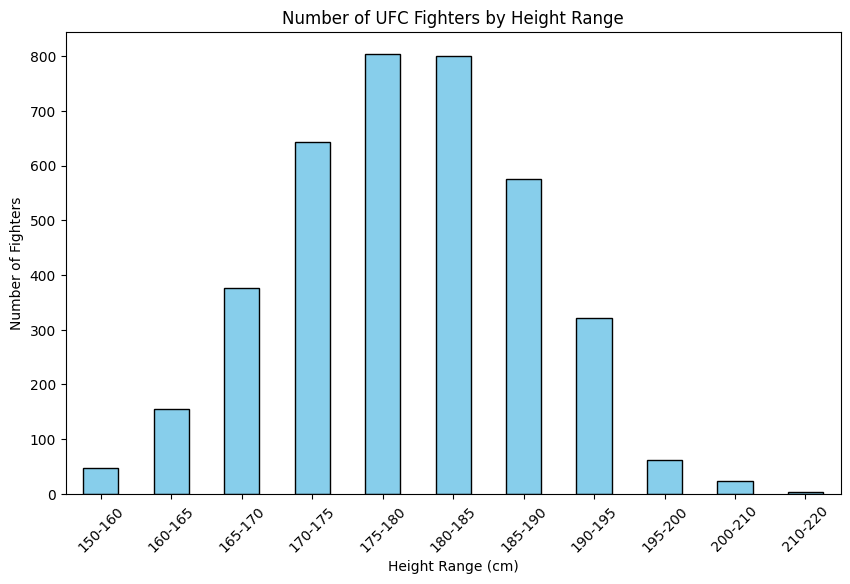

In [7]:
bins = [150, 160, 165, 170, 175, 180, 185, 190, 195, 200, 210, 220]  # Define height ranges
labels = ['150-160', '160-165', '165-170', '170-175', '175-180',
          '180-185', '185-190', '190-195', '195-200', '200-210', '210-220']

df['height_range'] = pd.cut(df['height_cm'], bins=bins, labels=labels, include_lowest=True)

height_counts = df['height_range'].value_counts(sort=False)

plt.figure(figsize=(10, 6))
height_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of UFC Fighters by Height Range')
plt.xlabel('Height Range (cm)')
plt.ylabel('Number of Fighters')
plt.xticks(rotation=45)
plt.show()

The bar graph highlights the distribution of UFC fighters across various height ranges. The majority of fighters fall within the **175-180 cm** and **180-185 cm** height categories, which are the most densely populated bins. Adjacent height ranges, such as **170-175 cm** and **185-190 cm**, also show significant numbers of fighters, indicating a general clustering around these heights.

Beyond the **190-195 cm** range, there is a sharp decline in the number of fighters, with very few exceeding **195 cm** in height. This trend suggests that most UFC fighters fall within a specific height range that is likely optimal for performance in their respective weight classes and divisions. The rapid drop-off in taller categories (e.g., **195-200 cm** and above) may reflect the physiological or weight constraints associated with the sport.

This distribution emphasizes that the majority of UFC fighters maintain heights that align with a balanced combination of reach, mobility, and strength, which are critical for competitive performance in MMA.



---


Let's make a graph representing number of UFC fighters in each weight category

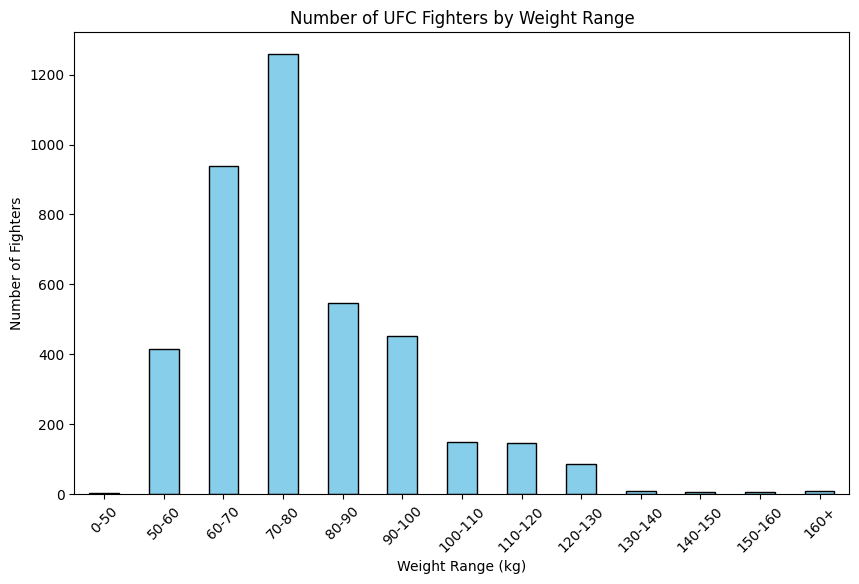

In [8]:
bins = [0, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, float('inf')]
labels = ['0-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160+']

df['weight_range'] = pd.cut(df['weight_in_kg'], bins=bins, labels=labels, include_lowest=True)

weight_counts = df['weight_range'].value_counts(sort=False)

plt.figure(figsize=(10, 6))
weight_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of UFC Fighters by Weight Range')
plt.xlabel('Weight Range (kg)')
plt.ylabel('Number of Fighters')
plt.xticks(rotation=45)
plt.show()

The bar graph shows the distribution of UFC fighters by weight, with most falling in the **70-80 kg** range, followed by **60-70 kg** and **80-90 kg**, showing the popularity of lightweight, welterweight, and middleweight divisions. There is a rapid decline in numbers of UFC fighters beyond **90-100 kg**, with few athletes in heavier weight classes above **120 kg** or lighter than **50 kg**. This suggests the **70-80 kg** range offers an optimal balance of speed, strength, and endurance, making it a highly competitive category.


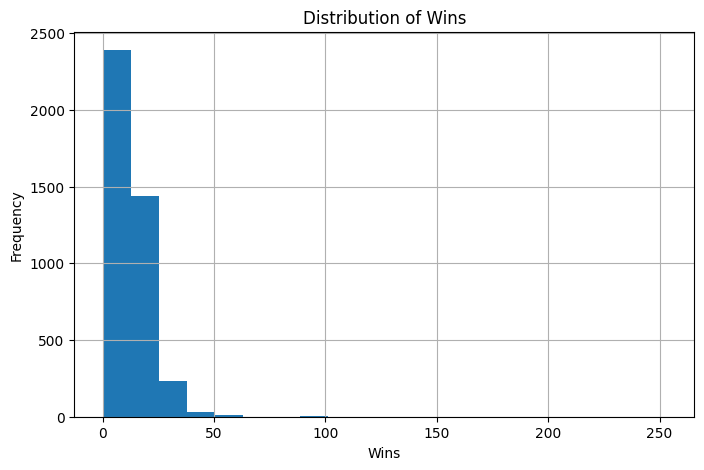

In [9]:
df['wins'].hist(bins=20, figsize=(8, 5))
plt.title('Distribution of Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.show()

The graph depicts that most of the UFC fighters have fewer than **20 wins**. A sharp decline is observed as the number of wins increases. Very few people have wins between **45-50** and rarely do fighters have more than **50 wins**, indicating that high win counts are rare in UFC.



---


Let's a boxplot for each type of height distribution by fighting stance.

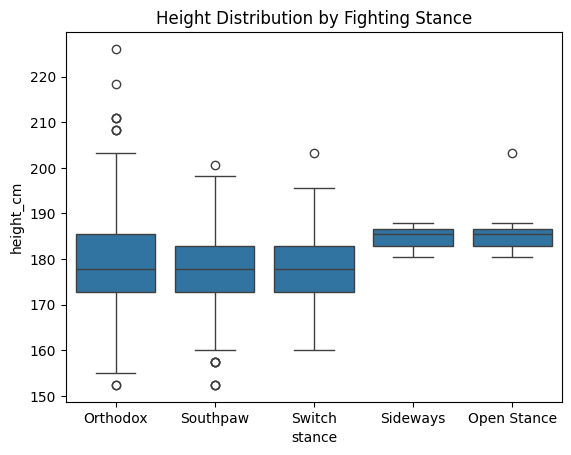

In [10]:
import seaborn as sns

sns.boxplot(x='stance', y='height_cm', data=df)
plt.title('Height Distribution by Fighting Stance')
plt.show()


The boxplot compares fighter heights across different stances. Fighters using the Orthodox stance exhibit the widest height range, while Sideways and Open Stance fighters are generally taller with less variation. Outliers are present in all categories, especially for taller fighters.




---


What about the average wins by the age of a fighter (by year of birth)?

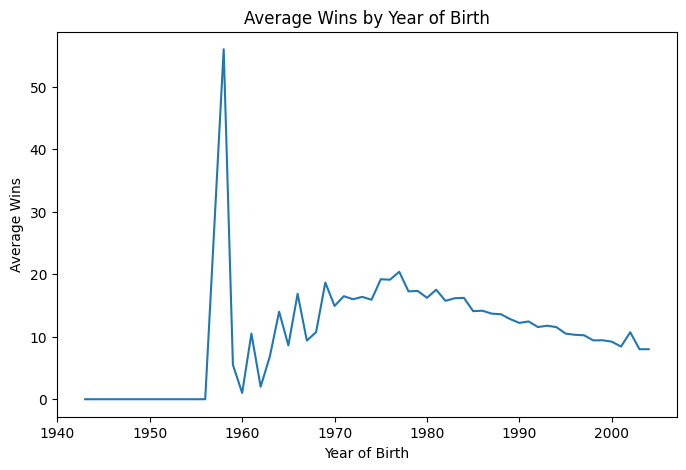

In [11]:
df['year_of_birth'] = pd.to_datetime(df['date_of_birth']).dt.year
df.groupby('year_of_birth')['wins'].mean().plot(kind='line', figsize=(8, 5))
plt.title('Average Wins by Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Average Wins')
plt.show()

The line graph shows the average wins of fighters by year of birth. There is a sharp spike for fighters born around 1960, likely due to outliers or fewer data points. From 1970 onwards, the average number of wins stabilizes, gradually declining for younger fighters born after 1990, possibly reflecting shorter career spans or less experience.



---


Let's compare the average striking accuracy by the type of stance

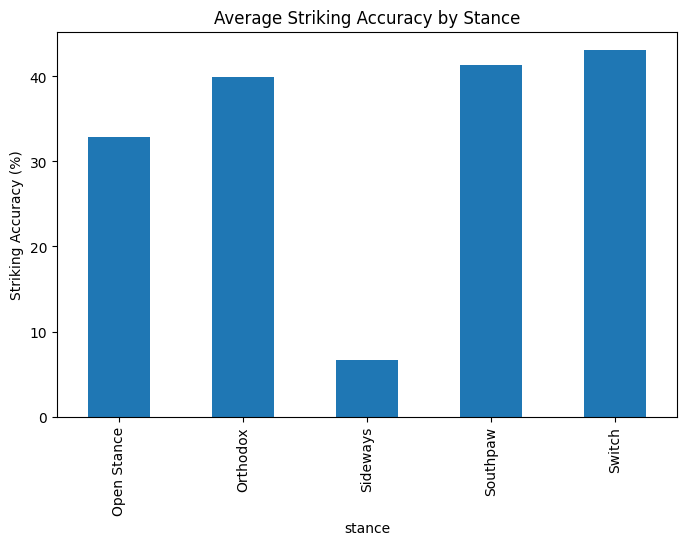

In [12]:
df.groupby('stance')['significant_striking_accuracy'].mean().plot(kind='bar', figsize=(8, 5))
plt.title('Average Striking Accuracy by Stance')
plt.ylabel('Striking Accuracy (%)')
plt.show()

The bar chart compares striking accuracy across different fighting stances. "Orthodox," "Southpaw," and "Switch" stances have the highest striking accuracy, while "Sideways" shows significantly lower accuracy. This highlights the effectiveness of conventional and dynamic stances in striking performance.

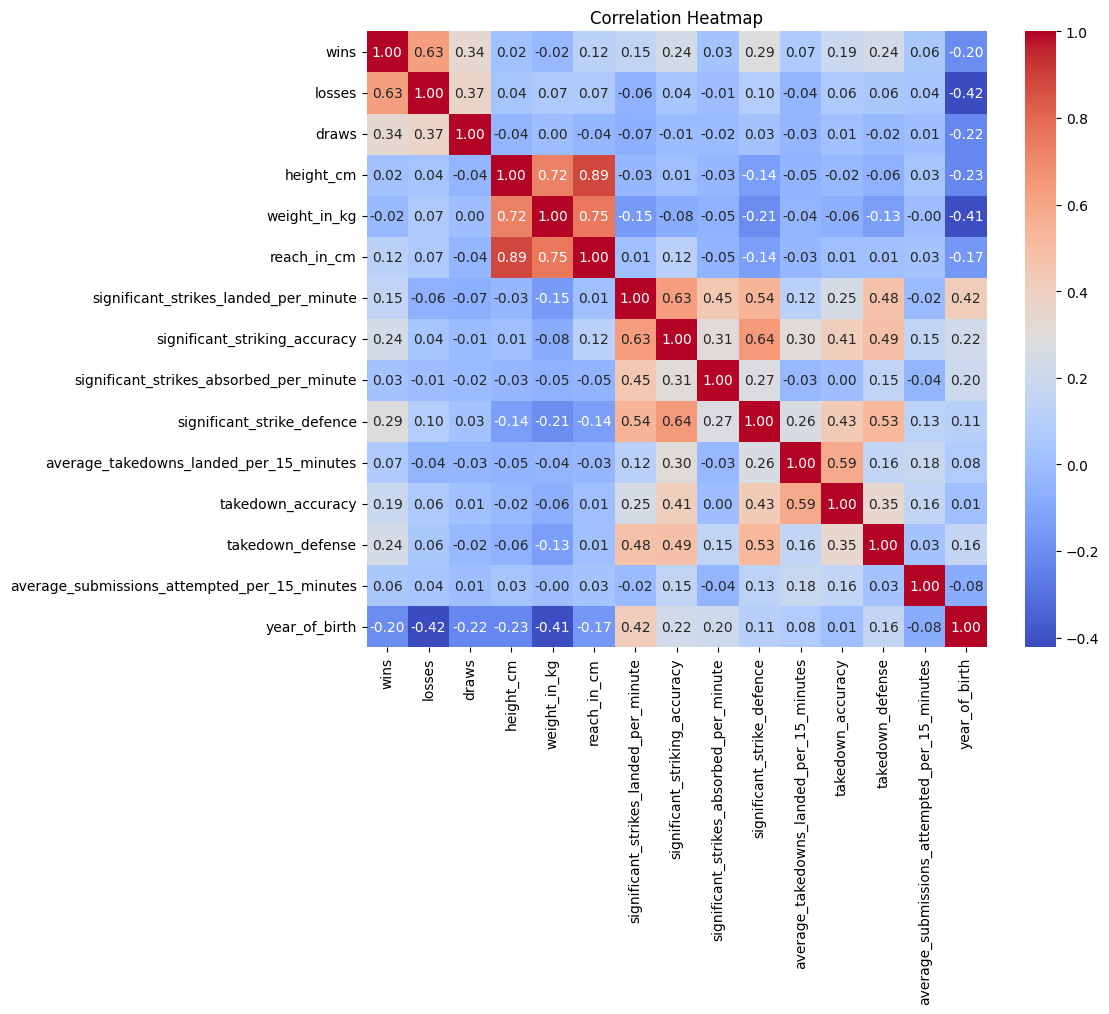

In [13]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**This heatmap shows the correlation between various fighter attributes:**

* Wins and Losses have a moderate negative correlation (-0.63), suggesting that as the number of wins increases, losses tend to decrease.
* Height, Weight, and Reach are strongly correlated, especially height and reach (0.89), indicating that taller fighters generally have longer reach.
* Striking Accuracy shows moderate positive correlation with metrics like significant strikes landed per minute (0.63) and strike defense (0.54), highlighting its importance in offensive and defensive success.
* Takedown Defense and Takedown Accuracy exhibit a moderate positive relationship (0.48), suggesting that fighters proficient in takedowns are often effective in defending against them.
* Year of Birth has negative correlations with wins (-0.20) and losses (-0.42), indicating that older fighters tend to have more fight records.



---
Now let's make a PCA to recduce the dimensionality of our dataset. This will help us to understand the varience between the data and make clusters. Furthermore, this will also simplify the analysis identifying crucial information. PCA is helpful when we need to find the relationship between the data and estimate its impact on regression or clustering models.

In [14]:
numeric_cols = ['height_cm', 'wins', 'losses', 'significant_strikes_landed_per_minute',
                     'significant_striking_accuracy', 'significant_strike_defence',
                     'average_takedowns_landed_per_15_minutes', 'takedown_accuracy']

df_clean = df[numeric_cols].dropna()


The numeric_cols list selects key numerical features like height, wins, losses, striking and grappling stats, which are essential for analyzing fighter performance. The *dropna()* method removes rows with missing values in these columns to ensure the dataset is clean and ready for machine learning or statistical analysis, focusing only on relevant and complete data for better results.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_clean)


In [16]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_data = pca.fit_transform(standardized_data)

df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])


This code standardizes the selected numerical features using *StandardScaler* to ensure all features have a mean of 0 and a standard deviation of 1, preparing the data for Principal Component Analysis. PCA is then applied to reduce the dataset's dimensionality to two principal components (PC1 and PC2), capturing the most significant patterns in the data. Finally, the results are stored in a DataFrame for easier interpretation and visualization.

In [17]:
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

print("PCA Components (Feature Weights):")
print(pca.components_)


Explained variance ratio:
[0.32498687 0.20069101]
PCA Components (Feature Weights):
[[-0.05693693  0.22681467  0.07240206  0.40770798  0.49783662  0.48739785
   0.33052488  0.42332113]
 [ 0.08727712  0.65030559  0.71295652 -0.16299068 -0.09633803 -0.01716166
  -0.14948187 -0.05188459]]


The explained variance ratio shows that the first two principal components capture approximately 32.5% and 20.1% of the data's variance, respectively. The PCA components reveal the weights of each feature in forming the principal components, with features like significant_striking_accuracy, significant_strike_defence, and average_takedowns_landed_per_15_minutes having high contributions to PC1, while wins and losses dominate PC2.

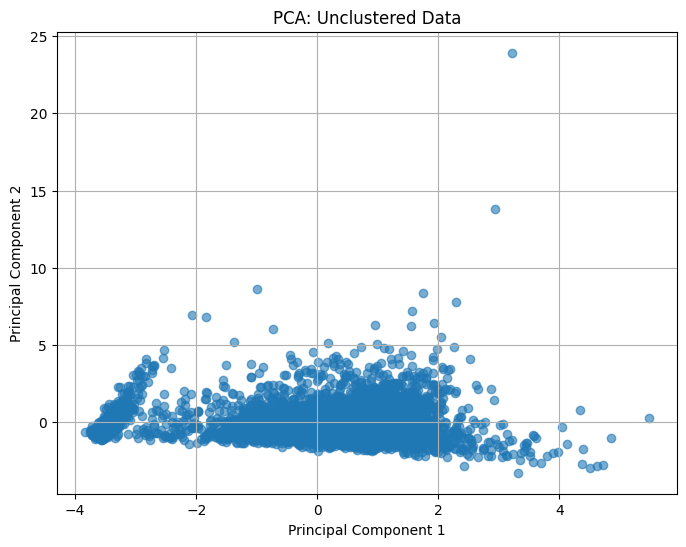

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.6)
plt.title('PCA: Unclustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


This the graph of the PCA.

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

df_pca['Cluster'] = clusters


This is a k-means clustering alogrithm. I selected 3 clusters as this is the most optimal way to split the data into 3 different information.

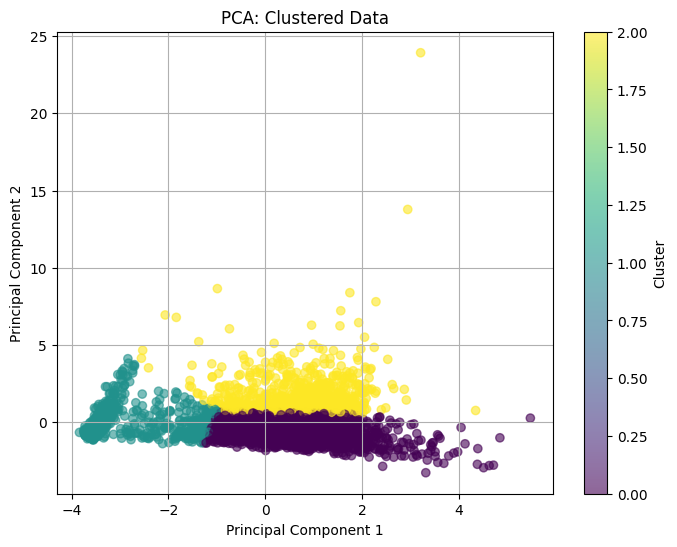

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA: Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


The scatter plot visualizes the clustering of data into three distinct groups based on the first two principal components (PC1 and PC2). Each cluster is color-coded, highlighting the natural groupings in the dataset as determined by the k-means algorithm. This visualization provides insight into the distribution and separation of clusters in reduced dimensions.

In [21]:
df_clean['Cluster'] = clusters

In [22]:
cluster_summary = df_clean.groupby('Cluster').mean()
print("Cluster Summary Statistics:")
print(cluster_summary)

Cluster Summary Statistics:
          height_cm       wins     losses  \
Cluster                                     
0        177.386957  11.023051   4.134535   
1        179.789422   7.122832   4.663295   
2        179.520980  24.774150  12.797279   

         significant_strikes_landed_per_minute  significant_striking_accuracy  \
Cluster                                                                         
0                                     3.275901                      45.318525   
1                                     0.283786                       7.508671   
2                                     2.551524                      41.333333   

         significant_strike_defence  average_takedowns_landed_per_15_minutes  \
Cluster                                                                        
0                         52.204526                                 1.722628   
1                         13.092486                                 0.008338   
2                   

The cluster summary provides insights into the characteristics of each group based on the mean values of key metrics:

* **Cluster 0:** Fighters in this group have an average height of 177 cm and moderate performance, with 11 wins and 4 losses on average. They land 3.28 significant strikes per minute with a striking accuracy of 45.3% and maintain solid takedown accuracy (34.1%).

* **Cluster 1:** This group shows the weakest performance. Fighters average only 7 wins and 4.6 losses, with extremely low striking activity (0.28 significant strikes per minute) and striking accuracy (7.5%). Their defensive metrics and takedown effectiveness are also minimal.

* **Cluster 2:** Fighters in this cluster exhibit the strongest performance, with an impressive average of 25 wins and 13 losses. While their striking activity (2.55 significant strikes per minute) and accuracy (41.3%) are slightly lower than Cluster 0, their overall dominance is reflected in their higher win count. They also maintain takedown accuracy (34.4%) comparable to Cluster 0.


# **Now let's make some comparisons about the clusters after completing k-means algorithm.**

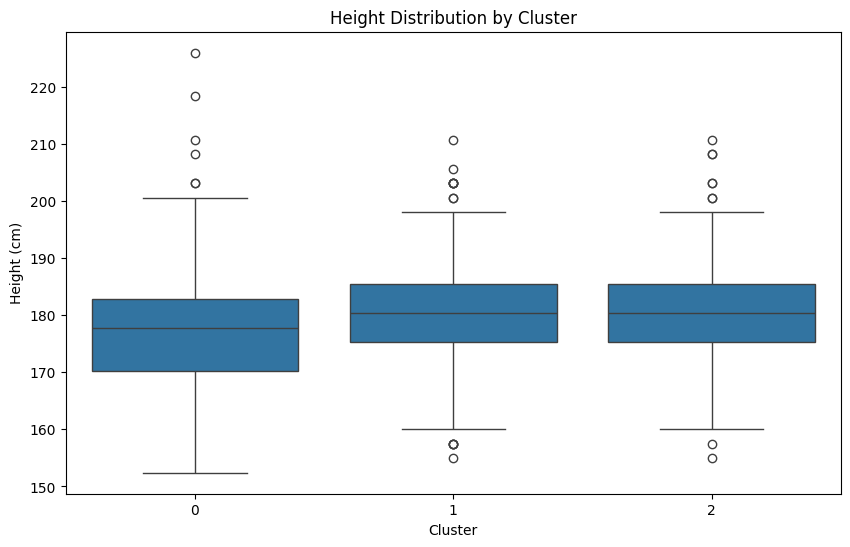

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='height_cm', data=df_clean)
plt.title('Height Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Height (cm)')
plt.show()

This boxplot shows the height distribution for each cluster. Cluster 0 has slightly shorter fighters on average (177 cm) compared to Clusters 1 and 2 (179 cm). All clusters exhibit similar variability, with some outliers exceeding 210 cm in height.



---
I wanted to compare the Silhouette Score for different numbers of PCAs. To do this, I compared the 2, 3, 4, 5 PCA numbers with each other and calculated Silhouette Score.


Silhouette Score for 2 PCA Components: 0.5954208496208299
Silhouette Score for 3 PCA Components: 0.4791034846535567
Silhouette Score for 4 PCA Components: 0.3947176997192429
Silhouette Score for 5 PCA Components: 0.37005426314289813


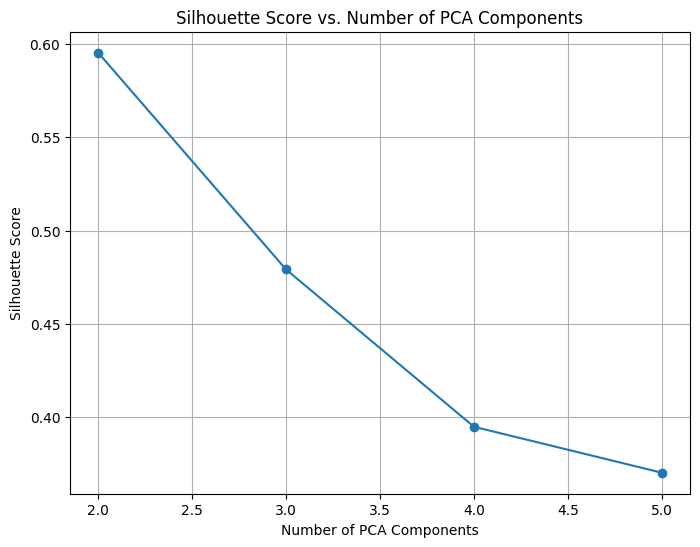

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

components = [2, 3, 4, 5]
scores = []

for n in components:
    pca = PCA(n_components=n)
    pca_data = pca.fit_transform(StandardScaler().fit_transform(df_clean))
    clusters = KMeans(n_clusters=3, random_state=42).fit_predict(pca_data)
    sil_score = silhouette_score(pca_data, clusters)
    scores.append(sil_score)
    print(f"Silhouette Score for {n} PCA Components: {sil_score}")

plt.figure(figsize=(8, 6))
plt.plot(components, scores, marker='o')
plt.title('Silhouette Score vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


As the number of PCAs incrase the Silhouette Score decreases. So the most optimal number of PCA is 2.



---

After clustering fighters with different parameters, I decided to make regression model that calculates the probability of winning, losing, and making tie for each fighter based on his performance.

Let's normalize wins, losses, and draws by dividing each column value by their row-wise sum.
This represents the probabilities of wins, losses, and draws.

In [25]:
df[['wins', 'losses', 'draws']] = df[['wins', 'losses', 'draws']].div(df[['wins', 'losses', 'draws']].sum(axis=1), axis=0)

Let's create a histogram that shows the distribution of fighters based on their probability of winning.

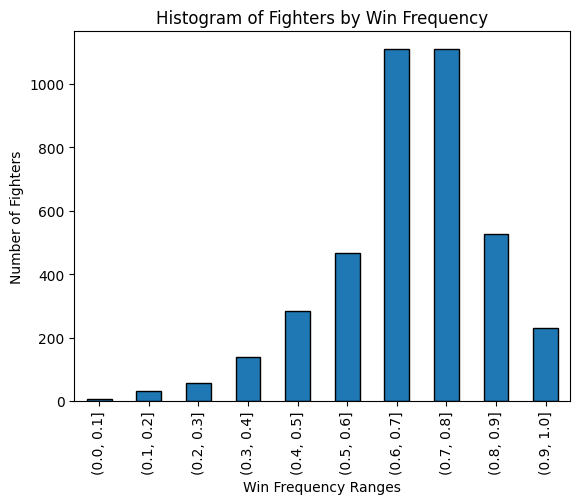

In [26]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

df['win_bins'] = pd.cut(df['wins'], bins=bins)
histogram = df['win_bins'].value_counts(sort=False)

histogram.plot(kind='bar', edgecolor="black")

plt.xlabel("Win Frequency Ranges")
plt.ylabel("Number of Fighters")
plt.title("Histogram of Fighters by Win Frequency")

plt.show()

Drop the nickname column as it doesn't affect the winning probability

In [27]:
df.drop(columns=['nickname'], inplace=True)

To handle NaN values in the dataset, I created three distinct functions that identify fighters with similar characteristics based on their height, weight, and reach. These functions analyze fighters who share similar physical attributes, calculate the mean of their corresponding values, and use this mean to fill the NaN values in the dataset.

In [28]:
def fill_height(row, df):
  if pd.isna(row['height_cm']):

    lower = row['weight_in_kg'] - 3
    upper = row['weight_in_kg'] + 3

    height_mean = df[(df['weight_in_kg'] >= lower) & (df['weight_in_kg'] <= upper) & (df['height_cm'].notna())]['height_cm'].mean()
    return height_mean
  else:
    return row['height_cm']

In [29]:
def fill_weight(row, df):
  if pd.isna(row['weight_in_kg']):

    lower = row['height_cm'] - 5
    upper = row['height_cm'] + 5

    weight_mean = df[(df['height_cm'] >= lower) & (df['height_cm'] <= upper) & (df['weight_in_kg'].notna())]['weight_in_kg'].mean()

    return weight_mean
  else:
    return row['weight_in_kg']


In [30]:
def fill_reach(row, df):
  if pd.isna(row['reach_in_cm']):

    lowerW = row['weight_in_kg'] - 3
    upperW = row['weight_in_kg'] + 3

    lowerH = row['height_cm'] - 5
    upperH = row['height_cm'] + 5

    reach_mean = df[(df['weight_in_kg'] >= lowerW) & (df['weight_in_kg'] <= upperW) & (df['height_cm'] >= lowerH) & (df['height_cm'] <= upperH) & (df['reach_in_cm'].notna())]['reach_in_cm'].mean()

    return reach_mean

  else:
    return row['reach_in_cm']

Let's apply these functions.

In [31]:
df['height_cm'] = df.apply(lambda row: fill_height(row, df), axis=1)
df['weight_in_kg'] = df.apply(lambda row: fill_weight(row, df), axis=1)
df['reach_in_cm'] = df.apply(lambda row: fill_weight(row, df), axis=1)

Also, to allow the regression model to evaluate the year of birth of fighters, I converted them to numerical values representing the year.

In [32]:
df["year_of_birth"] = pd.to_datetime(df["date_of_birth"], errors="coerce").dt.year

I created boolean representations for each type of stance to make them interpretable by the model.

In [33]:
stance_dummies = pd.get_dummies(df["stance"], prefix="stance", dummy_na=False)

df = pd.concat([df, stance_dummies], axis=1)

Now drop the columns that are not needed.

In [34]:
df.drop(columns=['stance', 'date_of_birth', 'losses', 'draws', "height_range", "weight_range", "win_bins"], inplace=True)

Let's check if there are still missing values.

In [35]:
missing = df.isnull().sum()
print(missing)

name                                               0
wins                                              19
height_cm                                         81
weight_in_kg                                      81
reach_in_cm                                       81
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
year_of_birth                                   1135
stance_Open Stance                                 0
stance_Orthodox                                    0
stance_Sideways                                    0
stance_Southpaw                                    0
stance_Switch                                 

To address the missing values in the 'year_of_birth' column, I used the K-Nearest Neighbors (KNN) algorithm to identify fighters with the most similar features and impute the missing values. Specifically, I selected features such as 'height_cm,' 'weight_in_kg,' 'reach_in_cm,' and 'year_of_birth' to calculate similarity. The imputed value for each missing entry is the mean of the corresponding values from its three nearest neighbors.

In [36]:
from sklearn.impute import KNNImputer

features = [
    "height_cm",
    "weight_in_kg",
    "reach_in_cm",
    "year_of_birth"
]

imputer = KNNImputer(n_neighbors=3)
df[features] = imputer.fit_transform(df[features])

In [37]:
missing = df.isnull().sum()
print(missing)

name                                             0
wins                                            19
height_cm                                        0
weight_in_kg                                     0
reach_in_cm                                      0
significant_strikes_landed_per_minute            0
significant_striking_accuracy                    0
significant_strikes_absorbed_per_minute          0
significant_strike_defence                       0
average_takedowns_landed_per_15_minutes          0
takedown_accuracy                                0
takedown_defense                                 0
average_submissions_attempted_per_15_minutes     0
year_of_birth                                    0
stance_Open Stance                               0
stance_Orthodox                                  0
stance_Sideways                                  0
stance_Southpaw                                  0
stance_Switch                                    0
dtype: int64


We still have 19 fighters with NaN values in wins column, we can drop these rows because it's not going to negatively affect our model

In [38]:
df = df.dropna()

Let's create X and y variables for the model

In [39]:
X = df.drop(columns=["wins", 'name'])

y = df["wins"]

Split them into training and test datasets.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [42]:
y_pred = model.predict(X_test)

## Model Evaluation

To evaluate the model, I calculated the proportion of predicted probabilities that fall within a specified margin of error compared to the actual values. This was done by dividing the number of predictions within the margin by the total number of predictions. This metric provides a practical measure of the model's accuracy, especially when exact predictions are less critical than being reasonably close.

The reason why \( R^2 \) doesn't work well in this case is that the target variable (winning probability) has a narrow range and low variance. \( R^2 \) measures the proportion of variance explained by the model, and when the variance in the target is inherently low, even small prediction errors can result in a low \( R^2 \) score. Additionally, \( R^2 \) might not reflect practical accuracy in scenarios where being within a margin of error is more relevant than minimizing variance.


In [43]:
for margin in [0.01, 0.05, 0.1, 0.15, 0.2]:
    within_margin = (abs(y_pred - y_test) <= margin).sum()
    accuracy_within_margin = within_margin / y_pred.size * 100
    print(f"Accuracy Within Margin of Error {margin}: {accuracy_within_margin:.2f}%")


Accuracy Within Margin of Error 0.01: 6.72%
Accuracy Within Margin of Error 0.05: 31.50%
Accuracy Within Margin of Error 0.1: 60.44%
Accuracy Within Margin of Error 0.15: 74.24%
Accuracy Within Margin of Error 0.2: 84.25%


Just to see which features have the most influence on the model's predictions.


In [44]:
import pandas as pd
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)


                                         Feature  Importance
11                                 year_of_birth    0.261815
3          significant_strikes_landed_per_minute    0.256499
5        significant_strikes_absorbed_per_minute    0.071764
4                  significant_striking_accuracy    0.065355
0                                      height_cm    0.056216
1                                   weight_in_kg    0.053506
2                                    reach_in_cm    0.052177
6                     significant_strike_defence    0.049289
7        average_takedowns_landed_per_15_minutes    0.044547
9                               takedown_defense    0.023492
10  average_submissions_attempted_per_15_minutes    0.022533
8                              takedown_accuracy    0.014826
15                               stance_Southpaw    0.012655
13                               stance_Orthodox    0.009127
16                                 stance_Switch    0.006166
12                      



---



# **Challenges**

One of the challenges I encountered while making this project was improving the accuracy of k-means alogrithm, where my model initially showed around 0.3 silhouette score which is considered low considering the amount of data I've provided. My mistake was including every numerical feature from the dataest. However, after analyzing heatmap that I've created before which depicts the relationship between features, I selected couple of features that might be interesting to analyze and make clusters according to these data. I selected 'height_cm' column as it clearly distinguishes fighters among each other. 'wins' and 'losses' where also important to include since they both indicate the performance of each fighter. I also included 'significant_strikes_landed_per_minute' which measures striking effectiveness,'significant_striking_accuracy' which indicates precision in striking,'significant_strike_defence' measures a fighter's ability to avoid strikes, 'average_takedowns_landed_per_15_minutes' which shows the grappling ability of a fighter, and 'takedown_accuracy' which is a takedown success rate. These statistics were particularly important to me and clearly showed difference between many fighters. After limiting to few columns I achieved around 0.6 silhouette score, which is a decent result considering the fact that most of the current fighters' statistics are similar.

Another problem that I encountered some technical issues while implementing the regression model that predicts the wining, losing, and making a draw. Specifically, making sure that the model handled multi-output predictions. After carefully featuring the selection and revising preprocessing, I overcame these issues and improved the regression model's accuracy. Paying attention to axis turned out to be the most important thing during the implementation of the project :)